In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def EM(dt,M,x0,a,b, plot = False):
    '''implements the psuedo-code from Des's notes, and plots a histogram of the results'''
    t_exit=[]
    for s in range(M):
        tn = 0
        Xn = x0
        while Xn>a and Xn<b:
            Rn = np.random.randn(1)
            Xn += dt*f(Xn) + np.sqrt(dt)*Rn*g(Xn)
            tn += dt
        t_exit.append(tn-0.5*dt) #This line could be changed.
    a_M = np.mean(t_exit)
    b2_M = 1/(M) * np.sum((t_exit-a_M)**2)
   
    if plot:
        histogram,bins = np.histogram(t_exit,bins=20,range=[0,20])
        midx = (bins[0:-1]+bins[1:])/2
        plt.bar(midx,histogram,label='Test')
        plt.show()
    return a_M, b2_M

In [3]:
def f(x):
    '''Set the f(x) function for the SDE'''
    return mu*x

def g(x):
    '''Set the g(x) function for the SDE'''
    return np.sqrt(2*D)


mu=-0.1
sigma=0.2
D = 1

t0 = time.time()
print(EM(0.1,500,0,-2,2))

print(time.time()-t0)
print()

(2.759399999999999, 5.128491639999983)
0.3167424201965332



The algorithm converged to the desired accuracy.


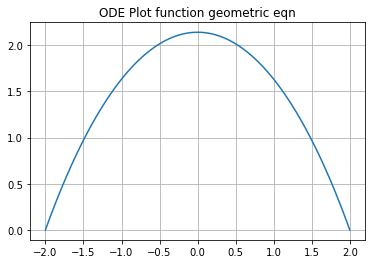

In [4]:
import scipy.integrate as integrate
import numpy as np
import time



def MET_ODE(x,y):
    '''This vectorises the 2nd order ODE for Mean Exit Times'''
    #I tried to define this so that it takes f and g as inputs, but couldn't get this to then work with the ODE solver
    y1,y2 = y
    y1dot = y2
    y2dot = -2*(1 + f(x)*y2)/(g(x)**2)
    return np.array([y1dot,y2dot])


def bc(ya, yb):
    return np.array([ya[0], yb[0]])

a=-2
b=2

x = np.linspace(a,b,30)

y_a = [np.sin(x),np.cos(x)]
y_b = np.zeros((2,x.size))
y_b[0]=3



# res_a = integrate.solve_bvp(anODE, bc, x, y_a)
# res_b = integrate.solve_bvp(harm, bc, x, y_b)


res = integrate.solve_bvp(MET_ODE, bc, x, y_b, max_nodes=10000, tol=1e-9)
print(res.message)

if res.success:
    x_disp = np.linspace(a,b,3001)
    y_disp = res.sol(x_disp) #This is how you evaluate the solution at a given x
    plt.plot(x_disp, y_disp[0]) #Note the indexing on y_disp, res.sol produces two outputs
    plt.title("ODE Plot function geometric eqn");
    plt.grid(); 

# e = u(x_disp)-y_disp

# #plt.plot(x_disp,e[0])
plt.show()

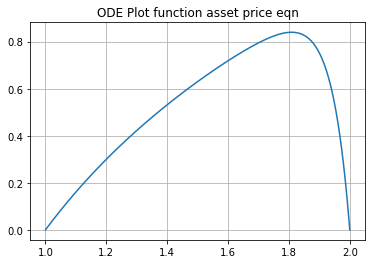

In [5]:
#Asset Price

def f(x):
    return lamb*(mu-x)

def g(x):
    return sigma * np.sqrt(abs(x))

lamb = 1
mu, sigma = 0.5, 0.3
a, b = 1, 2 #Set end points
x = np.linspace(a,b,30)
y_b = np.zeros((2,x.size))

AssetPrice = integrate.solve_bvp(MET_ODE, bc, x, y_b)

x_disp = np.linspace(a,b,3001)
y_disp = AssetPrice.sol(x_disp) #This is how you evaluate the solution at a given x
plt.plot(x_disp, y_disp[0]) #Note the indexing on y_disp, res.sol produces two outputs
plt.title("ODE Plot function asset price eqn");
plt.grid(); 

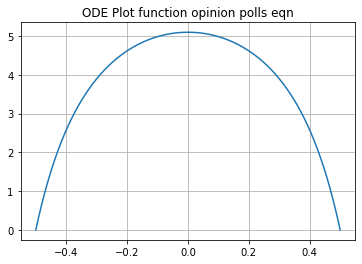

In [6]:
#Opinion Polls

def f(x):
    return -mu*(x/(1-x**2))

def g(x):
    return sigma

mu, sigma = 0.5, 0.3
a, b = -0.5, 0.5 #Set end points
x = np.linspace(a,b,30)
y_b = np.zeros((2,x.size))

OpinionPoll = integrate.solve_bvp(MET_ODE, bc, x, y_b)

x_disp = np.linspace(a,b,3001)
y_disp = OpinionPoll.sol(x_disp) #This is how you evaluate the solution at a given x
plt.plot(x_disp, y_disp[0]) #Note the indexing on y_disp, res.sol produces two outputs
plt.title("ODE Plot function opinion polls eqn");
plt.grid(); 

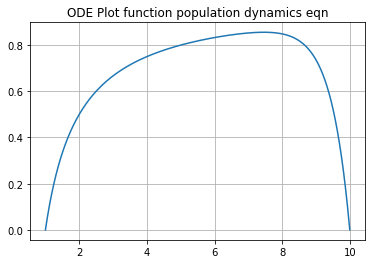

In [7]:
#Population Dynamics

def f(x):
    return r*x*(K-x)

def g(x):
    return beta*x

r = 1
K = 1
beta = 1
a,b = 1,10
x = np.linspace(a,b,30)
y = np.zeros((2,x.size))


PopulationDynamics = integrate.solve_bvp(MET_ODE, bc, x, y)

x_disp = np.linspace(a,b,3001)
y_disp = PopulationDynamics.sol(x_disp) #This is how you evaluate the solution at a given x
plt.plot(x_disp, y_disp[0]) #Note the indexing on y_disp, res.sol produces two outputs
plt.title("ODE Plot function population dynamics eqn");
plt.grid(); 

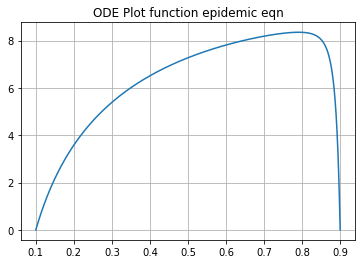

In [8]:
#Epidemic Model

def f(x):
    p1 = (p-1)*B*x
    p2 = (beta0*C - alpha)*(1-x)*x
    return p1 + p2

def g(x):
    return rho*C*(1-x)*x

p = 0.4
B = 1
beta0 = 2
rho = 1
alpha = 1
C = 1

a,b = 0.1,0.9
x = np.linspace(a,b,30)
y = np.zeros((2,x.size))


Epidemic = integrate.solve_bvp(MET_ODE, bc, x, y)

x_disp = np.linspace(a,b,3001)
y_disp = Epidemic.sol(x_disp) #This is how you evaluate the solution at a given x
plt.plot(x_disp, y_disp[0]) #Note the indexing on y_disp, res.sol produces two outputs
plt.title("ODE Plot function epidemic eqn");
plt.grid(); 

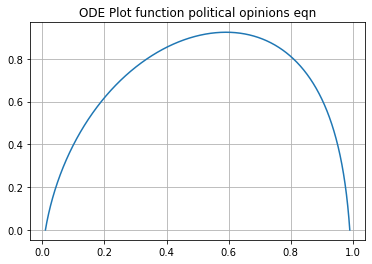

In [9]:
def f(x):
    return r*(G-x)

def g(x):
    return np.sqrt(eps*x*(1-x))

r = 1
G = 0.3
eps = 2
a,b = 0.01,0.99
x = np.linspace(a,b,30)
y = np.zeros((2,x.size))


PoliticalOpinions = integrate.solve_bvp(MET_ODE, bc, x, y)

x_disp = np.linspace(a,b,3001)
y_disp = PoliticalOpinions.sol(x_disp) #This is how you evaluate the solution at a given x
plt.plot(x_disp, y_disp[0]) #Note the indexing on y_disp, res.sol produces two outputs
plt.title("ODE Plot function political opinions eqn");
plt.grid(); 


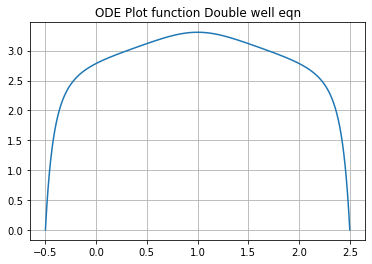

In [10]:
def f(x):
    return -8*x + 12*x**2 - 4*x**3

def g(x):
    return sigma

sigma = 1
a,b = -0.5,2.5
x = np.linspace(a,b,30)
y = np.zeros((2,x.size))


DoubleWell = integrate.solve_bvp(MET_ODE, bc, x, y)

x_disp = np.linspace(a,b,3001)
y_disp = DoubleWell.sol(x_disp) #This is how you evaluate the solution at a given x
plt.plot(x_disp, y_disp[0]) #Note the indexing on y_disp, res.sol produces two outputs
plt.title("ODE Plot function Double well eqn");
plt.grid(); 